##### Importar os dados necessários.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Exercícios/Page View Time Series Visualizer/fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [7]:
# Limpando os dados retirando os dias em que o número de visualizações da página está entre os 2.5% mais baixos e 2.5% mais altos
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

##### Plotar o número de acessos através de um gráfico de linha.

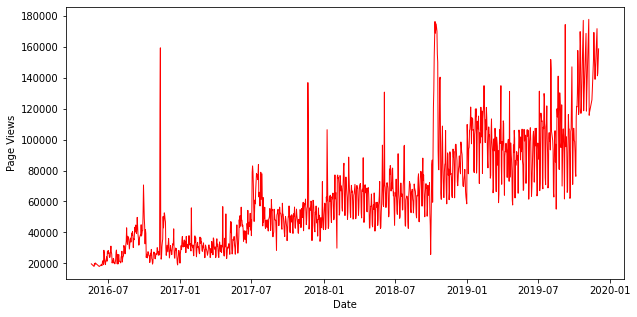

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.ticklabel_format(style='plain')

ax.plot(df.index, df['value'], 'r', linewidth = 1)
ax.set_title = ('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.show()

##### Plotar a média de acessos mensais através de um gráfico de barra. 

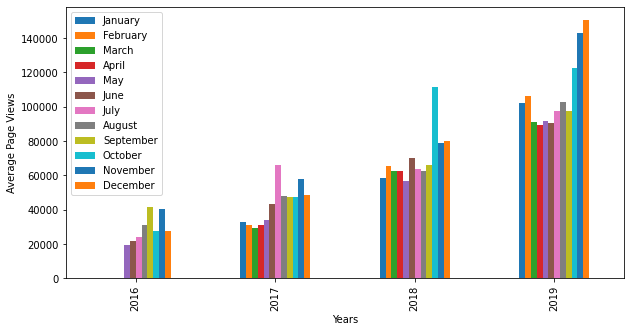

In [9]:
df2 = df.copy() # Duplicando para fazer de outro método posteriormente
df['month'] = df.index.month
df['year'] = df.index.year

df_bar = df.groupby(['year', 'month'], as_index = True)['value'].mean()
df_bar = df_bar.unstack()

fig = df_bar.plot.bar(legend = True, figsize = (10, 5), ylabel = 'Average Page Views', xlabel = 'Years').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

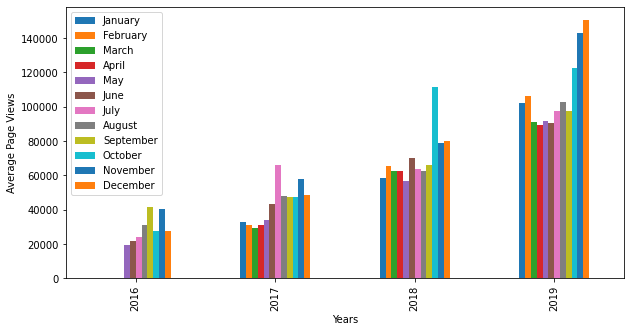

In [10]:
# Outro método, utilizando pivot_table
df2['month'] = df.index.month
df2['year'] = df.index.year

df_bar2 = df.groupby(['month', 'year'], as_index = False)['value'].mean() # Nesse caso, o 'as_index' deve ser 'False', pois o pivot_table já irá transformar a coluna 'month' em um index

df_bar2 = df2.pivot_table('value', ['year'], 'month')

fig2 = df_bar2.plot.bar(legend = True, figsize = (10, 5), ylabel = 'Average Page Views', xlabel = 'Years').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

##### Plotar a distribuição de visualizações em boxplots.

In [11]:
# Duplicando o DataFrame para poder fazer as alterações necessárias
df_box = df.copy()

In [12]:
# Adicionando uma nova coluna de index para possibilitar a criação de novas colunas baseadas na coluna 'date'
df_box.reset_index(inplace = True)

In [13]:
df_box['year'] = [d.year for d in df_box['date']]
df_box['month'] = [d.strftime('%b') for d in df_box['date']] # 'strftime('%b')' significa que o mês aparecerá como string e abreviado
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

[Text(0, 0.5, 'Page View'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

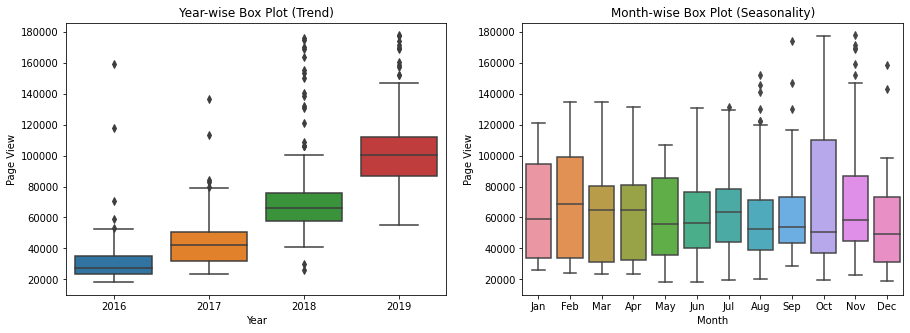

In [14]:
# Plotando os dados
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5)) # Especificando que os dados serão expostos em uma linha e duas colunas 
box_year = sns.boxplot(data = df_box, x = 'year', y = 'value', ax = axes[0]) 
box_month = sns.boxplot(data = df_box, x = 'month', y = 'value', ax = axes[1])

box_year.set(xlabel = 'Year', ylabel = 'Page View', title = 'Year-wise Box Plot (Trend)')
box_month.set(xlabel = 'Month', ylabel = 'Page View', title = 'Month-wise Box Plot (Seasonality)')